### Simple Practical Example on Linear Regrission with Multi Featuers "House Price"

##### Import Libraries

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from IPython.display import Image, display 

##### Generate Sample Data

In [3]:
# Creating sample data (Square footage, Number of bedrooms, Age of house) as features
np.random.seed(0)
X1 = np.random.randint(500, 4000, 100)  # Square footage
X2 = np.random.randint(1, 6, 100)       # Number of bedrooms
X3 = np.random.randint(1, 100, 100)     # Age of house
y = 50000 + (X1 * 100) + (X2 * 5000) - (X3 * 200) + np.random.normal(0, 20000, 100)  # House price with noise

# Combine features into a single dataset
data = pd.DataFrame({'Square footage': X1, 'Bedrooms': X2, 'Age': X3, 'Price': y})

In [4]:
data.head()

,Square footage,Bedrooms,Age,Price
0,3232,1,55,330974.424182
1,3107,5,80,357076.495645
2,2153,4,12,264336.816309
3,3764,3,39,463414.438339
4,1335,1,94,173609.986706


In [5]:
data.shape

(100, 4)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Square footage  100 non-null    int32  
 1   Bedrooms        100 non-null    int32  
 2   Age             100 non-null    int32  
 3   Price           100 non-null    float64
dtypes: float64(1), int32(3)
memory usage: 2.1 KB


In [7]:
data.describe()

,Square footage,Bedrooms,Age,Price
count,100.000000,100.000000,100.000000,100.000000
mean,2361.000000,2.750000,47.700000,287005.870509
std,999.717324,1.395339,28.381777,106611.080937
min,584.000000,1.000000,1.000000,83304.637618
25%,1326.750000,1.000000,28.000000,187504.219665
50%,2541.000000,3.000000,44.500000,309015.587612
75%,3191.500000,4.000000,70.500000,372929.018625
max,3968.000000,5.000000,98.000000,471186.180902


##### Feature Engineering

In [8]:
# Separate features and target variable
X = data[['Square footage', 'Bedrooms', 'Age']]
y = data['Price']

# Apply polynomial feature transformation (to capture non-linear relationships.)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

##### Feature Scaling

In [9]:
# Standardize features to improve the efficiency of gradient descent.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_poly)

##### Define the Cost Function

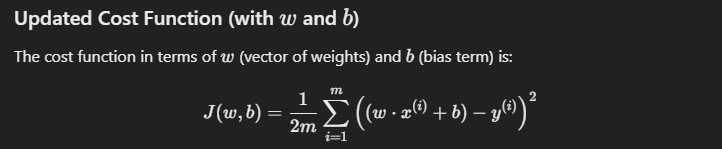

In [19]:
# Load and display the image
display(Image(filename='images/cost_fun.png'))

In [11]:
def compute_cost_with_wb(X, y, w, b):
    m = len(y)
    predictions = X.dot(w) + b
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

##### Gradient Descent

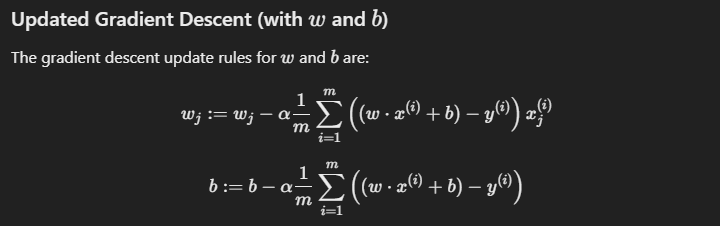

In [20]:
# Load and display the image
display(Image(filename='images/gradient_descent.png'))

In [21]:
# ( := ) this sign mean overwriting 

In [12]:
def gradient_descent_with_wb(X, y, w, b, learning_rate, iterations):
    m = len(y)
    cost_history = []
    
    for i in range(iterations):
        predictions = X.dot(w) + b
        error = predictions - y
        
        # Update weights and bias
        w -= (learning_rate / m) * X.T.dot(error)
        b -= (learning_rate / m) * np.sum(error)
        
        # Record cost for each iteration
        cost_history.append(compute_cost_with_wb(X, y, w, b))
    
    return w, b, cost_history

##### Initialize Parameters and Run Gradient Descent

In [13]:
# Initialize parameters
w = np.zeros(X_scaled.shape[1])  # Initialize weights
b = 0  # Initialize bias
learning_rate = 0.01
iterations = 1000

w, b, cost_history = gradient_descent_with_wb(X_scaled, y, w, b, learning_rate, iterations)

##### Compare Gradient Descent vs Normal Equation

In [22]:
'''The Normal equation is another way to calculate w,b only for linear regression
Cons: Very slow when number of featuers is large then 10000
**Gradient Descent: Estimated theta values from iterative updates.
**Normal Equation: Directly calculated theta values for the same features.'''

'The Normal equation is another way to calculate w,b only for linear regression\nCons: Very slow when number of featuers is large then 10000\n**Gradient Descent: Estimated theta values from iterative updates.\n**Normal Equation: Directly calculated theta values for the same features.'

##### Visualize Cost over Iterations (Gradient Descent)

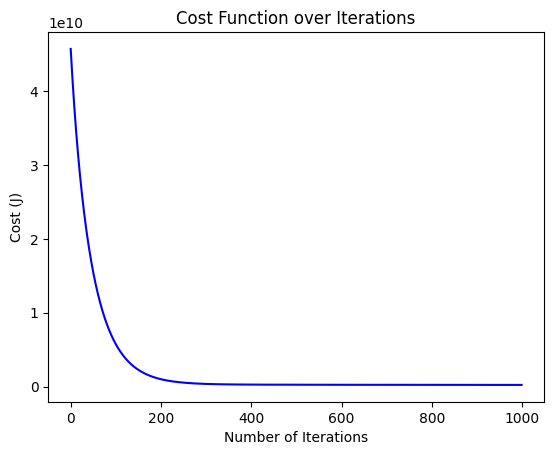

In [15]:
plt.plot(range(iterations), cost_history, color='blue')
plt.title("Cost Function over Iterations")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost (J)")
plt.show()